<a href="https://colab.research.google.com/github/pramudyadika/Spotify-Top-Chart-22/blob/main/460558_Pramudya_KH_Spotify_Top_Chart_2021_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Top Chart 2022


This dataset providing list of all songs, that have appeared in a weekly Spotify top chart.
Data have been collected from https://charts.spotify.com/charts/overview/global.
Dataset provides name of the song, artist, URI(Uniform Resource Identifier), peak rank in the top charts that this song got, number of weeks on chart and main features of the song such as danceability, energy etc.


The reason why I choose this datasets is because i like to hear music almost everyday, and its become my hobby. And because of that, I want to analyze what is the current trending song among user in Spotify(Music Platform).

### Variable Description

- uri: unique identifier of the song, you can paste the uri inside spotify search box and the song will be displayed

- artist_name: Name of the artist, if the song features another artist, it will be addend in here

- track_names: Name of the track. Featured artist are also included in this field.

- peak_rank Peak rank in the charts.

- weeks_on_chart

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- energy: Perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB).

- mode: Mode indicates the modality (major -1- or minor -0-) of a track.

- speechiness: Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- duration_ms: The duration of the track in milliseconds.

### Installing library

In [ ]:
!wget https://raw.githubusercontent.com/JoseCaliz/dotfiles/main/css/custom_css.css 2>/dev/null 1>&2
!pip install feature_engine 2>/dev/null 1>&2
!pip install dython 2>/dev/null 1>&2

# ##installing different version because some features isn't supported by current version
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

### Import library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import math
from google.colab import drive
from scipy import stats

### Import Datasets

In [ ]:
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
data21 = pd.read_csv('drive/MyDrive/RekDat/spotify_top50_2021.csv')
data22 = pd.read_csv('drive/MyDrive/RekDat/spotify_top_charts_22.csv')

# DATA INTEGRATION


In here, we add another data set which is spotify top 50 chart in 2021 that contain the same attributes as in spotify top chart 2022 because it's from the same author.

In [ ]:
df = pd.DataFrame(data22)
df2 = pd.DataFrame(data21)
df2 = df2.rename(columns ={"artist_name":"artist_names"})

Dropping the unnecessary column

In [ ]:
newdf21 = df2.drop(["id","artist_names","track_name","track_id","popularity", "valence"], axis='columns')

In [ ]:
newdf22 = df.drop(["uri","artist_names","track_name","weeks_on_chart","peak_rank"], axis='columns')

Merging two data sets

In [ ]:
newdf=pd.concat([newdf21, newdf22])

newdf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature
0,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,143.875,242013,4
1,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,178.781,137704,4
2,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,169.928,141806,4
3,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,166.928,178147,4
4,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,102.977,203064,4
...,...,...,...,...,...,...,...,...,...,...,...,...
641,0.725,0.446,4,-8.958,0,0.0287,0.85000,0.243000,0.1070,90.024,187333,4
642,0.578,0.431,2,-7.034,1,0.0269,0.46900,0.000000,0.1370,116.979,226975,3
643,0.872,0.422,1,-7.415,0,0.3630,0.02540,0.000000,0.1090,149.956,180666,4
644,0.730,0.785,9,-7.986,0,0.2430,0.10500,0.000000,0.0445,82.037,215120,4


# DATA CLEANING

We can use the z-score to identify outliers by treating as outliers all the data points that are too far away from 0.
It is common to use -3 and +3 as threshold. Any data point with a z-score below -3 or above +3 are treated as outliers. The reason for this common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

The easiest and most secure way to calculate z-scores is the stats.zscore() function of SciPy library. Let’s apply it to the data:

In [ ]:
# Calculate the z-scores
z_scores = stats.zscore(newdf)
z_scores

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature
0,-0.763512,-1.281752,1.349785,-0.960352,0.850160,-0.500630,1.967957,-0.170683,-0.529488,0.805150,0.722526,0.205674
1,-0.549638,-0.842780,0.799595,-0.155052,-1.176249,1.124861,0.143773,-0.170872,1.703614,2.038672,-1.218678,0.205674
2,-0.563005,0.748493,-1.126073,0.324265,0.850160,-0.595834,-0.834374,-0.170872,-0.551894,1.725821,-1.142339,0.205674
3,-0.750145,0.138810,1.074690,0.494208,0.850160,0.463441,0.305069,-0.170872,-0.687075,1.619806,-0.466029,0.205674
4,0.178872,1.120400,0.249404,0.979706,-1.176249,-0.477580,-0.947550,-0.170872,-0.817775,-0.640121,-0.002320,0.205674
...,...,...,...,...,...,...,...,...,...,...,...,...
641,0.332594,-1.190300,-0.300787,-1.017514,-1.176249,-0.792256,2.282869,3.068502,-0.522020,-1.097859,-0.295076,0.205674
642,-0.649892,-1.281752,-0.850977,-0.274399,0.850160,-0.810295,0.819681,-0.170872,-0.297963,-0.145312,0.442667,-2.715732
643,1.315081,-1.336624,-1.126073,-0.421554,-1.176249,2.557938,-0.883915,-0.170872,-0.507083,1.020043,-0.419150,0.205674
644,0.366012,0.876527,1.074690,-0.642094,-1.176249,1.355356,-0.578220,-0.170872,-0.988805,-1.380107,0.222044,0.205674


In [ ]:
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df_wo_outliers = newdf[filtered_entries]
df_wo_outliers.shape

(638, 12)

We have identified and removed 696-638=58 rows that had a z-score above or below 3.

## BEFORE REMOVING OUTLIERS

### Show Boxplot

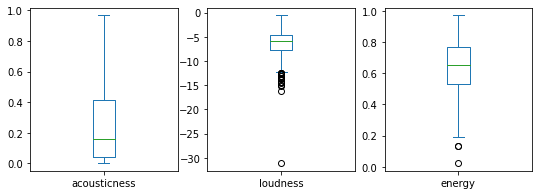

In [ ]:
f, ax = plt.subplots(1,3,figsize=(9,3))

newdf["acousticness"].plot(kind="box",ax=ax[0])
newdf["loudness"].plot(kind="box",ax=ax[1])
newdf["energy"].plot(kind="box",ax=ax[2])

### Comparison between Acousticness, Energy, and Loudness

Using scatterplot

Text(0.5, 1.0, 'acousticness & Energy Relations')

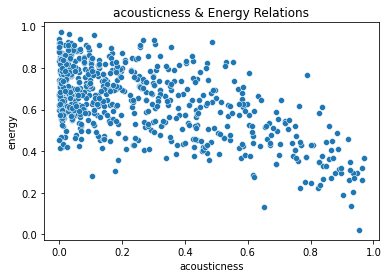

In [ ]:
sns.scatterplot(data=newdf, x="acousticness",y="energy")
plt.title("acousticness & Energy Relations")

#  acousticness & energy have negative correlation
#  it means if acoustics increase then energy will decrease

Text(0.5, 1.0, 'Loudness & Energy Relations')

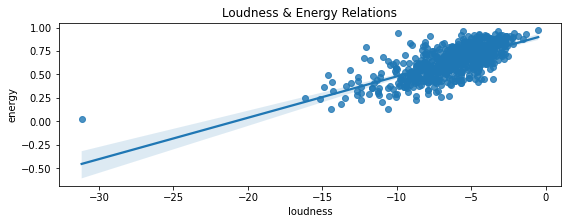

In [ ]:
plt.figure(figsize=(9,3))
sns.regplot(data=newdf,x="loudness",y="energy")
plt.title("Loudness & Energy Relations")

# Energy & Loudness is linearly dependent
# It means when Loudness increase then Energy increase

### Show distribution of numerical variables of most popular Songs

In [ ]:
# converting duration into minutes
newdf['duration_m'] = newdf.duration_ms.div(1e3).div(60)


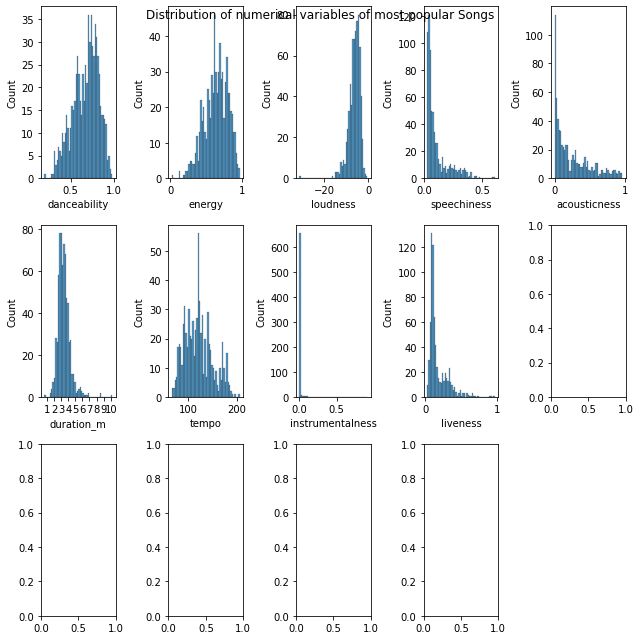

In [ ]:
numerical_columns = [
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'duration_m',
    'tempo', 'instrumentalness', 'liveness',
]

no_rows = math.ceil(len(numerical_columns)/3)
fig, ax = plt.subplots(3,5, figsize=(9, no_rows*3))
ax = ax.flatten()
axs = {}

for i, column in enumerate(numerical_columns):
    sns.histplot(newdf[column], ax=ax[i], bins=50)
    axs[column] = ax[i]

axs['duration_m'].xaxis.set_major_locator(ticker.MaxNLocator(11))
ax[-1].set_axis_off()
fig.suptitle('Distribution of numerical variables of most popular Songs');
plt.tight_layout()

## AFTER REMOVING OUTLIERS

In [ ]:
# Remove Energy Outliers
iqr = 1.5 * np.percentile(newdf["energy"],75) - np.percentile(newdf["energy"],55)
newdf.drop(newdf[(newdf["energy"] > (iqr + np.percentile(newdf["energy"],75))) | (newdf["energy"] < (np.percentile(newdf["energy"],55)-iqr))].index,inplace=True)

# Remove loudness Outliers
iqr = 1.5 * np.percentile(newdf["loudness"],75) - np.percentile(newdf["loudness"],15)
newdf.drop(newdf[(newdf["loudness"] < (np.percentile(newdf["loudness"],10)-iqr))].index,inplace=True)

# Remove acousticness Outliers
iqr = 1.5 * np.percentile(newdf["acousticness"],65) - np.percentile(newdf["acousticness"],25)
newdf.drop(newdf[(newdf["acousticness"] > (iqr + np.percentile(newdf["acousticness"],65)))].index,inplace =True)

### Show Boxplot

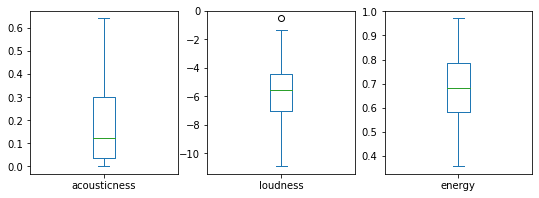

In [ ]:
f, ax = plt.subplots(1,3,figsize=(9,3))

newdf["acousticness"].plot(kind="box",ax=ax[0])
newdf["loudness"].plot(kind="box",ax=ax[1])
newdf["energy"].plot(kind="box",ax=ax[2])

### Comparison between Acousticness, Energy, and Loudness

Using scatterplot

Text(0.5, 1.0, 'acousticness & Energy Relations')

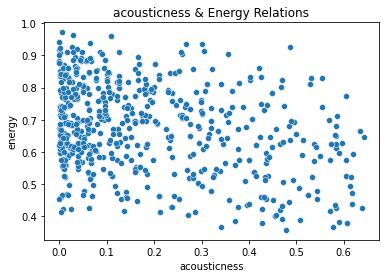

In [ ]:
sns.scatterplot(data=newdf, x="acousticness",y="energy")
plt.title("acousticness & Energy Relations")

#  acousticness & energy have negative correlation
#  it means if acoustics increase then energy will decrease

Text(0.5, 1.0, 'Loudness & Energy Relations')

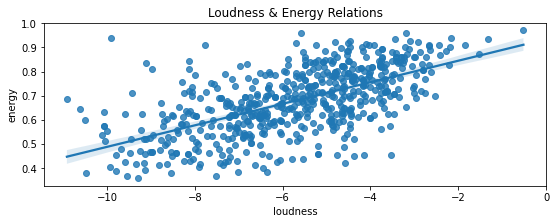

In [ ]:
plt.figure(figsize=(9,3))
sns.regplot(data=newdf,x="loudness",y="energy")
plt.title("Loudness & Energy Relations")

# Energy & Loudness is linearly dependent
# It means when Loudness increase then Energy increase

### Show distribution of numerical variables of most popular Songs

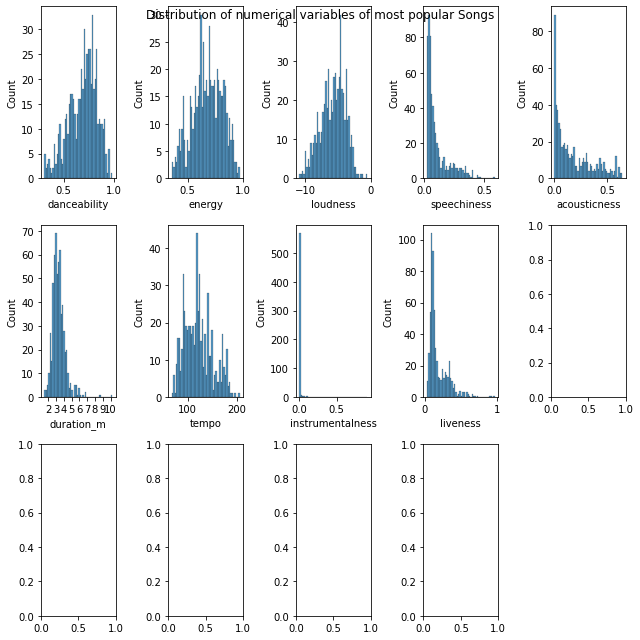

In [ ]:
numerical_columns = [
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'duration_m',
    'tempo', 'instrumentalness', 'liveness',
]

no_rows = math.ceil(len(numerical_columns)/3)
fig, ax = plt.subplots(3,5, figsize=(9, no_rows*3))
ax = ax.flatten()
axs = {}

for i, column in enumerate(numerical_columns):
    sns.histplot(newdf[column], ax=ax[i], bins=50)
    axs[column] = ax[i]

axs['duration_m'].xaxis.set_major_locator(ticker.MaxNLocator(11))
ax[-1].set_axis_off()
fig.suptitle('Distribution of numerical variables of most popular Songs');
plt.tight_layout()

# DATA REDUCTION

Using PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(newdf), columns=newdf.columns)
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,duration_m
0,-0.694859,-1.284955,0.805074,-0.521204,-1.158092,1.152430,0.615092,-0.152051,1.629615,2.011811,-1.230798,0.192923,-1.230798
1,-0.709063,0.639402,-1.109783,0.146063,0.863489,-0.622076,-0.814647,-0.152051,-0.578792,1.699742,-1.153496,0.192923,-1.153496
2,-0.907920,-0.097899,1.078625,0.382644,0.863489,0.470325,0.850856,-0.152051,-0.711150,1.593992,-0.468650,0.192923,-0.468650
3,0.079265,1.089156,0.257972,1.058514,-1.158092,-0.500124,-0.980075,-0.152051,-0.839121,-0.660287,0.000911,0.192923,0.000911
4,-0.098287,0.138037,-1.383334,-0.228703,0.863489,0.108603,0.772268,-0.152051,1.739304,-1.116670,-0.092975,0.192923,-0.092975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.398857,0.455077,0.805074,-0.135684,0.863489,-0.617942,-0.970139,-0.151696,-0.593417,-0.025116,0.323763,0.192923,0.323763
593,-1.192002,0.101172,-1.109783,1.050449,0.863489,-0.260353,-0.283056,-0.152051,1.059231,-0.971510,-0.806616,0.192923,-0.806616
594,-0.801389,-1.815812,-0.836232,-0.687348,0.863489,-0.843243,1.603054,-0.152051,-0.330163,-0.166715,0.451513,-2.760280,0.451513
595,1.286613,-1.882169,-1.109783,-0.892206,-1.158092,2.630324,-0.887061,-0.152051,-0.534916,0.995727,-0.421179,0.192923,-0.421179


In [ ]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.152144,1.903546,0.161589,2.589851,-1.612593,0.814424,-0.387393,-0.279015,0.479635,-0.051827,-0.213952,-0.663248,3.733339e-16
1,-1.481779,-0.375719,1.977052,0.935922,0.069057,-1.174305,0.299974,-0.188705,-1.077475,0.115544,0.091925,0.304538,6.152272e-16
2,-0.541960,0.380636,0.646975,1.263312,0.076209,-0.489947,1.070902,-1.676760,0.786087,0.260177,-0.093036,-0.170418,-3.330127e-16
3,-0.598890,-1.655831,-0.717742,-0.116204,0.754956,0.649537,0.404109,0.477858,-0.596648,0.427345,0.757732,-0.080333,1.317052e-15
4,0.097340,0.322384,0.878197,-1.534643,-1.468521,-0.130127,-1.281422,0.360359,0.616919,-0.042910,0.089592,0.350121,3.542549e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.126799,-0.950351,-0.260767,-0.056929,0.965098,-0.440084,0.061058,-0.614289,-0.307405,-0.968616,-0.235242,0.373254,-3.570350e-17
593,-0.935734,-0.483244,1.718678,-1.048000,-0.746067,0.045494,-0.728929,0.194499,0.371788,-0.228066,1.071392,-0.678106,1.749528e-16
594,1.712704,2.421886,1.746829,-1.426372,0.135046,0.716184,1.547158,-0.080536,-0.351941,-0.327572,-0.489379,-0.193763,-1.555617e-16
595,-0.521767,2.059979,-1.670641,1.349240,-0.699989,-1.871996,0.216470,1.863681,-0.553645,-0.055910,0.003377,-1.006750,-1.444367e-17


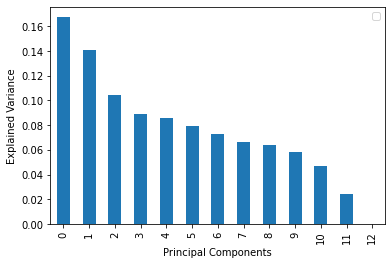

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

The first 7 Principal Components are capturing around 80% of the variance so we can replace the 13 original features with the new 7 features having 80% of the information. So, we have reduced the 13 dimensions to only 7 dimensions while retaining most of the information.

# SAVING NEW DATA

Saving the new data into csv

In [ ]:
newdf.to_csv('drive/MyDrive/RekDat/spotify_top_charts_21_22_merged.csv',index=False)